# Description

The dataset for the jobs in tech sector has been collected from two sources: 
- $1$) Labor Market Information Portal (Jobs data till November 2021)
- $2$) Kaggle (Data for 2018 Job Postings scrapped from  seek.com.au)

To analyze the data, python and its different libraries such as pandas, numpy, Matplotlib, and Seaborn have been used. The following results gives Tech Council the idea about the Current Number Jobs in Tech Sector, the top job positions, and distributions with respect to Job Types as well. Also, the Regions with highest and lowest number of Tech Jobs have also been identified in this work.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_summary=pd.read_excel("ER Employment by Industry - November 2021.xlsx",sheet_name="SA4 based regions")

In [3]:
df_summary=df_summary.loc[df_summary["Employment Region"]!="Australia"]

In [4]:
df_summary.head(2)

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
0,Capital Region,NSW/ACT,"Agriculture, Forestry and Fishing",7200,3800,3400,3900,3300,1000,2.1
1,Capital Region,NSW/ACT,Mining,500,500,0,200,300,0,0.1


In [5]:
print(" Different Industries : \n\n" , df_summary["Industry"].unique())

 Different Industries : 

 ['Agriculture, Forestry and Fishing' 'Mining' 'Manufacturing'
 'Electricity, Gas, Water and Waste Services' 'Construction'
 'Wholesale Trade' 'Retail Trade' 'Accommodation and Food Services'
 'Transport, Postal and Warehousing'
 'Information Media and Telecommunications'
 'Financial and Insurance Services'
 'Rental, Hiring and Real Estate Services'
 'Professional, Scientific and Technical Services'
 'Administrative and Support Services' 'Public Administration and Safety'
 'Education and Training' 'Health Care and Social Assistance'
 'Arts and Recreation Services' 'Other Services']


In [6]:
data_sum=df_summary.loc[(df_summary["Industry"]=="Information Media and Telecommunications") | (df_summary["Industry"]=="Professional, Scientific and Technical Services")].sum()

In [7]:
data_sum[3:]

Employment by Industry - Total    1390800
Employed Full-Time                1093400
Employed Part-Time                 297000
Employed - Male                    773100
Employed - Female                  617500
Five year growth by Industry       182400
Employment Distribution (%)         354.3
dtype: object

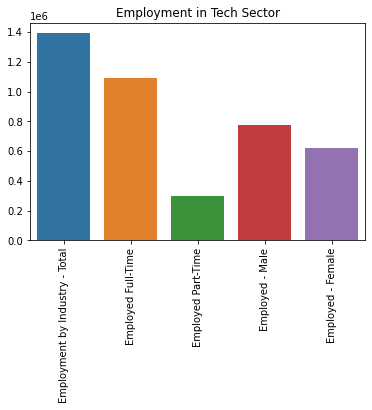

In [8]:
plt.title("Employment in Tech Sector")
_=sns.barplot(x=data_sum[3:8].index,y=data_sum[3:8].values)
_=plt.xticks(rotation=90)

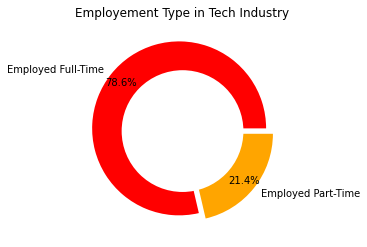

In [9]:


# Setting labels for items in Chart
Type = data_sum[4:6].index
# Setting size in Chart based on

# colors
colors = ['#FF0000', '#FFA500']
# explosion
explode = (0.05, 0.05)
 
# Pie Chart
plt.pie(data_sum[4:6], colors=colors, labels=Type,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Employement Type in Tech Industry')
 
# Displaying Chart
plt.show()


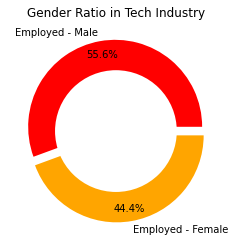

In [10]:

# Setting labels for items in Chart
Employee = data_sum[6:8].index
# Setting size in Chart based on

# colors
colors = ['#FF0000', '#FFA500']
# explosion
explode = (0.05, 0.05)
 
# Pie Chart
plt.pie(data_sum[6:8], colors=colors, labels=Employee,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Gender Ratio in Tech Industry')
 
# Displaying Chart
plt.show()


In [11]:
data_tech=df_summary.loc[(df_summary["Industry"]=="Information Media and Telecommunications") | (df_summary["Industry"]=="Professional, Scientific and Technical Services")]
data_region=data_tech.groupby("Employment Region")["Employment by Industry - Total"].sum().reset_index()


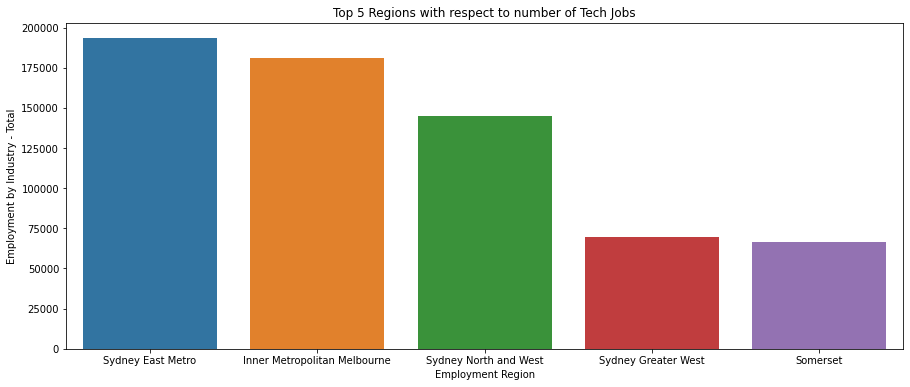

In [12]:
top_5_regions=data_region.loc[data_region["Employment by Industry - Total"].isin(data_region["Employment by Industry - Total"].nlargest(5))].sort_values(by="Employment by Industry - Total",ascending=False)
plt.figure(figsize=(15,6))
plt.title("Top 5 Regions with respect to number of Tech Jobs")
_=sns.barplot(x="Employment Region",y="Employment by Industry - Total",data=top_5_regions)

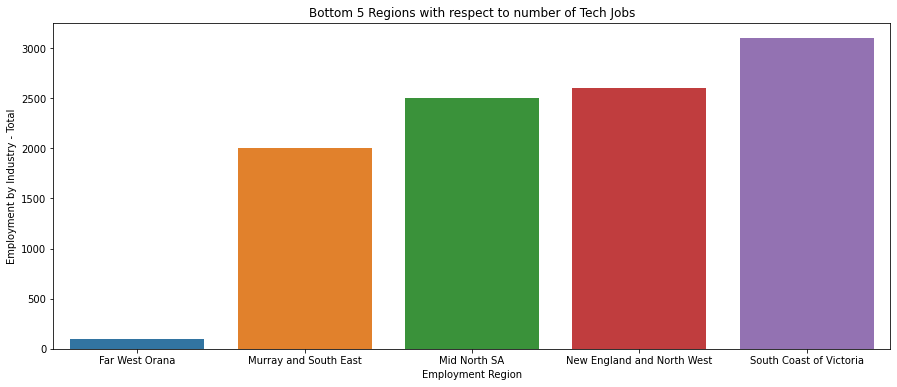

In [13]:
bottom_5_regions=data_region.loc[data_region["Employment by Industry - Total"].isin(data_region["Employment by Industry - Total"].nsmallest(5))].sort_values(by="Employment by Industry - Total")
plt.figure(figsize=(15,6))
plt.title("Bottom 5 Regions with respect to number of Tech Jobs")
_=sns.barplot(x="Employment Region",y="Employment by Industry - Total",data=bottom_5_regions)

# Time Series Data for Industries

In [14]:
df_time=pd.read_excel("ER Employment by Industry Time Series - November 2021.xlsx",sheet_name="SA4 based regions")

In [15]:
df_time=df_time.loc[df_time["Employment Region"]!="Australia"]

In [16]:
df_time.head(2)

,Employment Region,State/Territory,Industry,2021-11-01 00:00:00,2020-11-01 00:00:00,2016-11-01 00:00:00
0,Capital Region,NSW/ACT,"Agriculture, Forestry and Fishing",7200,3300,6200
1,Capital Region,NSW/ACT,Mining,500,800,500


In [17]:
df_time.rename(columns={df_time.columns[3]: 'November - 2021',df_time.columns[4]: 'November - 2020', df_time.columns[5]: 'November - 2016'},inplace=True)

In [18]:
data_sum_time=df_time.loc[(df_time["Industry"]=="Information Media and Telecommunications") | (df_time["Industry"]=="Professional, Scientific and Technical Services")].sum()
data_sum_time

Employment Region    Capital RegionCapital RegionCentral WestCentra...
State/Territory      NSW/ACTNSW/ACTNSWNSWNSWNSWNSWNSWNSWNSWNSWNSWNS...
Industry             Information Media and TelecommunicationsProfes...
November - 2021                                                1390800
November - 2020                                                1321200
November - 2016                                                1208400
dtype: object

In [19]:
data_sum_time=data_sum_time[3:].sort_index()

In [20]:
projection=data_sum[-2:-1].rename({"Five year growth by Industry":"November - 2025"})+data_sum_time[-1]
projection=projection.append(data_sum_time[-1:])

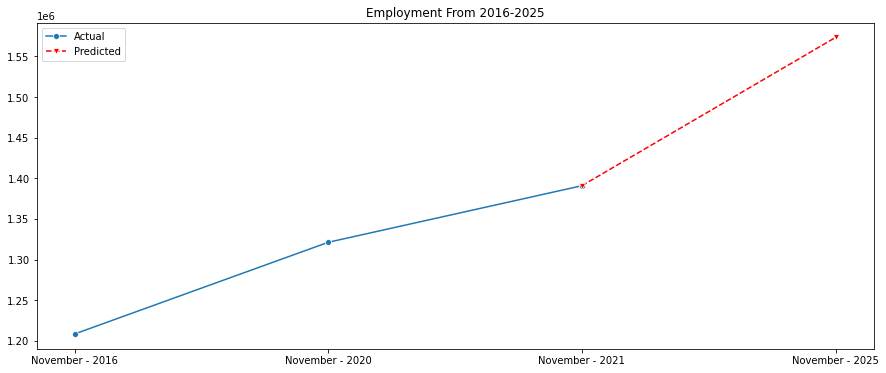

In [21]:
plt.figure(figsize = (15, 6))
plt.title("Employment From 2016-2025")
sns.lineplot(x=data_sum_time.index,y=data_sum_time,marker="o", label = 'Actual')
sns.lineplot(x=projection.index,y=projection, linestyle="dashed" ,marker="v",color = 'red',label = 'Predicted')
_=plt.legend()

# Job Postings

In [22]:
df_jobs=pd.read_csv("seek_australia_sample.csv",encoding='cp1252')

In [23]:
print(df_jobs.shape[0], " Different Job Postings ")

20030  Different Job Postings 


In [24]:
df_jobs["category"].unique()

array(['Mining, Resources & Energy', 'Retail & Consumer Products',
       'Manufacturing, Transport & Logistics',
       'Administration & Office Support', 'Construction',
       'Banking & Financial Services', 'Healthcare & Medical',
       'Trades & Services', 'Human Resources & Recruitment',
       'Information & Communication Technology', 'Hospitality & Tourism',
       'Sales', 'Government & Defence', 'Insurance & Superannuation',
       'Community Services & Development', 'Engineering',
       'Education & Training', 'Accounting', 'Marketing & Communications',
       'Science & Technology', 'Legal', 'Call Centre & Customer Service',
       'Farming, Animals & Conservation', 'Consulting & Strategy',
       'Real Estate & Property', 'Sport & Recreation',
       'Design & Architecture', 'Advertising, Arts & Media',
       'CEO & General Management', 'Self Employment'], dtype=object)

In [25]:
tech_jobs=df_jobs.loc[(df_jobs["category"]=="Information & Communication Technology") | (df_jobs["category"]=="Science & Technology")]

In [26]:
print("Number of Tech Jobs Postings in 2018: ", tech_jobs.shape[0])

Number of Tech Jobs Postings in 2018:  2019


In [27]:
percentage=round((tech_jobs.shape[0]/df_jobs.shape[0])*100,2)
print("Percentage of Tech jobs are ", percentage)

Percentage of Tech jobs are  10.08


### Let's Check for the top Jobs per posting

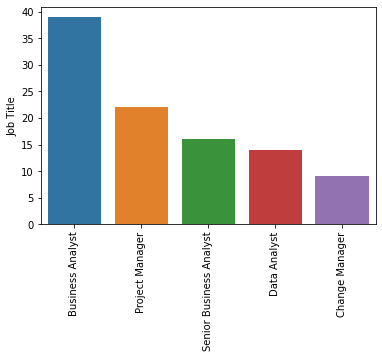

In [28]:
top5=tech_jobs["job_title"].value_counts().nlargest(5)
sns.barplot(x=top5.index,y=top5)
_=plt.xticks(rotation=90)
_=plt.ylabel("Job Title")

As it can be seen, the Analyst and Manager type roles have top job postings. Therefore, Tech Council can focus on equipping people with these skills as it is a growing market.

In [29]:
job_types=tech_jobs["job_type"].value_counts()


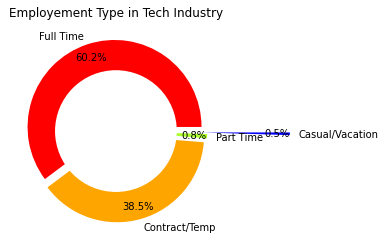

In [30]:

# Setting labels for items in Chart
Employee = job_types.index
# Setting size in Chart based on

# colors
colors = ['#FF0000', '#FFA500', '#ADFF2F', '#0000FF']
# explosion
explode = (0.05, 0.05,0.05, 1)
 
# Pie Chart
plt.pie(job_types, colors=colors, labels=Employee,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Employement Type in Tech Industry')
 
# Displaying Chart
plt.show()


# THE END!